# Example of environment simulation

In [39]:
import numpy as np
from gxr.envir import EnvirGame, EnvirDynamics, DynamicsPlotter

# Configuration for the game
# can be also read from JSON-file with an analogous structure
# using the `.from_json` constructor method
config = {
    "n_agents": 1,        # number of players
    "E0": .4,
    "scale_capacity": True,
    "envir": {
        "K": 10,
        "T": 10
    },
    "profits": {
        "sustenance": .3,   # sustenance proportionality factor
        "cost": .0,         # harvesting cost proportionality factor
    },
    "foresight": {
        "horizon": 50
    }
}
behavior = {
    "delay": 1,
    "eta": .1,
    "noise": 1,
    # "seed": 303
    "rules": [
        {"alpha": .4, "@rule": "ForesightRule"}
    ]
}
game     = EnvirGame.from_params(**config)
tmax     = 200*round(game.envir.T_epsilon)
dynamics = EnvirDynamics(game, behavior)

In [40]:
sol = dynamics.run(tmax, progress=True)
T, E, P, H = sol.get_arrays()
U   = game.utility.func(P)
sol.ode.message

'The solver successfully reached the end of the integration interval.'

In [41]:
game.foresight.gamma

0.9990793899844618

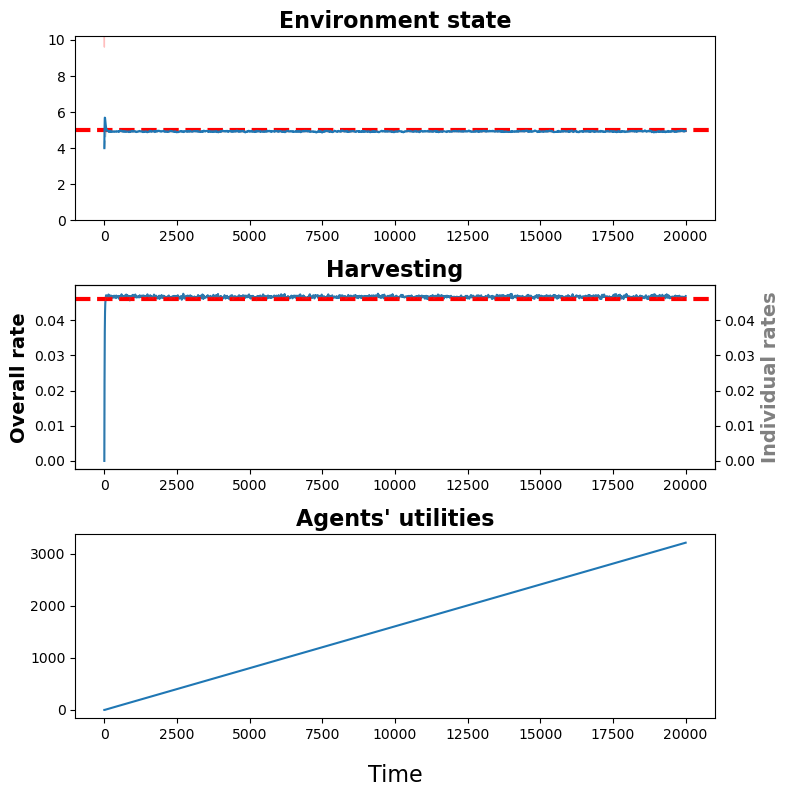

In [42]:
plotter = DynamicsPlotter(dynamics, sol)
fig, axes = plotter.subplots(nrows=3, figsize=(8, 8))

plotter.plot_state(axes[0], show_vicious=True, show_perceived=True)
plotter.plot_harvesting(axes[1])
plotter.plot_utilities(axes[2])
fig.tight_layout()
fig